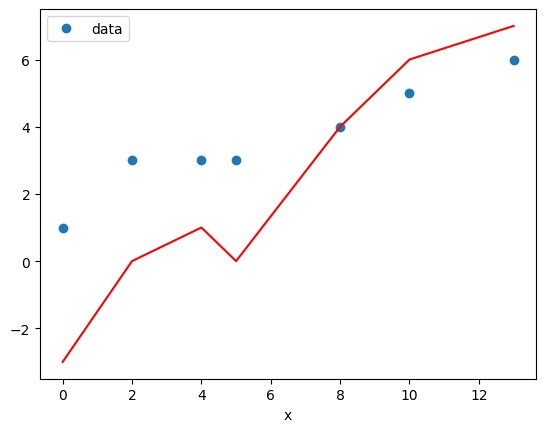

In [7]:
import matplotlib.pyplot as plt

# Exercise 1

x = [0,2,4,5,8,10,13]
y = [1,3,3,3,4,5,6]
f = [-3,0,1,0,4,6,7]


plt.plot(x, y, 'o', label="data")
plt.plot(x, f, color="red")

plt.xlabel("x")
plt.legend()
plt.show()

C:\Users\fairc\AppData\Local\Temp\ipykernel_1764\630804481.py:19: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(times, east, 'o', label="east")
C:\Users\fairc\AppData\Local\Temp\ipykernel_1764\630804481.py:20: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(times, west, 'o', label="west")
C:\Users\fairc\AppData\Local\Temp\ipykernel_1764\630804481.py:21: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(times, total, 'o', label="total")


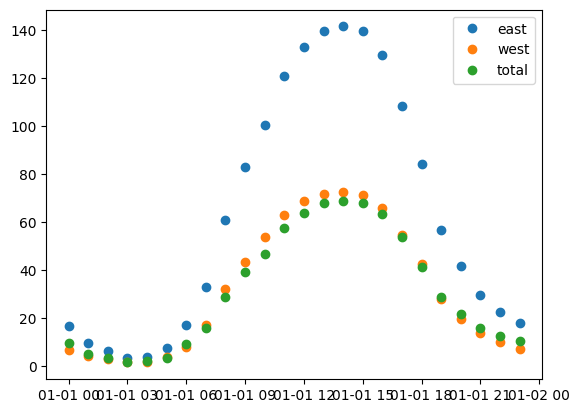

In [ ]:
import csv
from datetime import datetime

with open("data/hourly_cycle_count_weekend.csv","r") as file:
    reader = csv.reader(file)
    next(reader, None) # skip the headers
    
    times = []
    east = []
    west = []
    total = []

    for row in reader:
        times.append(datetime.fromisoformat("2000-01-01T"+row[0]))
        east.append(float(row[1]))
        west.append(float(row[2]))
        total.append(float(row[3]))

plt.plot_date(times, east, 'o', label="east")
plt.plot_date(times, west, 'o', label="west")
plt.plot_date(times, total, 'o', label="total")

plt.legend()

[['DO1', 'DO2', 'DO3', 'DO4', 'DO5', 'DO6', 'DO7', 'DO8', 'DO9', 'DO10', 'DO11', 'DO12', 'DO13', 'DO14', 'DO15', 'DO16', 'DO17', 'DO18', 'DO19', 'DO20', 'DO21', 'DO22', 'DO23', 'DO24', 'DO25', 'DO26', 'DO27', 'DO29', 'DO30', 'DO31', 'DO32', 'DO33', 'DO34', 'DO35', 'DO36', 'DO37', 'DO38', 'DO39', 'DO40', 'DO41', 'DO42', 'DO43', 'DO44', 'DO45', 'DO46', 'DO47', 'DO48', 'DO49', 'DO50', 'DO51', 'DO52', 'DO53', 'DO54', 'DO55', 'DO56', 'DO57', 'DO58', 'DO59', 'DO60', 'DO61', 'DO62', 'DO63', 'DO64', 'DO65', 'DO66', 'DO67', 'DO68', 'DO69', 'DO70', 'DO71', 'DO72', 'DO73', 'DO74', 'DO75', 'DO76', 'DO77', 'DO78', 'DO79', 'DO80', 'DO81', 'DO82', 'DO83', 'DO84', 'DO85', 'DO86', 'DO87', 'DO88', 'DO89', 'DO90', 'DO91', 'DO92', 'DO93', 'DO94', 'DO95', 'DO96', 'DO97', 'DO98', 'DO99', 'DO100', 'DO101', 'DO103', 'DO104', 'DO105', 'DO106', 'DO108', 'DO109', 'DO110', 'DO112', 'DO113', 'DO114', 'DO115', 'DO116', 'DO117', 'DO118', 'DO119', 'DO120', 'DO121', 'DO122', 'DO123', 'DO124', 'DO125', 'DO126', 'DO127'

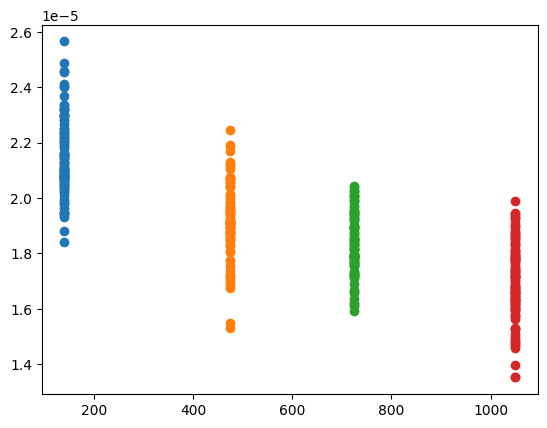

In [47]:
# Python program to get transpose
# elements of two dimension list
def transpose(l1, l2):
 
    # iterate over list l1 to the length of an item 
    for i in range(len(l1[0])):
        # print(i)
        row =[]
        for item in l1:
            # appending to new list with values and index positions
            # i contains index position and item contains values
            row.append(item[i])
        l2.append(row)
    return l2

# Exercise 3

with open('data/beam_data.csv') as file:
    reader = csv.reader(file)

    heads = [word.strip() for word in next(reader)]
    units = next(reader)

    data_T = []

    for row in reader:
        data_row = []
        for x in row:
            try:
                data_row.append(float(x))
            except:
                data_row.append(x)
        data_T.append(data_row)

    data = []

    transpose(data_T, data)

print(data)

# w=beam width, h=beam height
def SecondMomentOfArea(w, h): 
    return w * (h**3) / 12

# E=Young's modulus, I=second momment of area, A=cross sectional area, L=beam length, p=density
def NaturalFrequency(E, I, w, h, L, p):
    return (3.14 / (2 * L * L)) * ((E * I) / (p * w * h))**0.5


find = lambda str: heads.index(str)
print(find('beam_width'))
print(find('beam_height'))

print(heads)

smas = [SecondMomentOfArea(sample[find('beam_width')], sample[find('beam_height')]) for sample in data_T]

nfq = [NaturalFrequency(sample[find('youngs_modulus')], sma, sample[find('beam_width')], sample[find('beam_height')], sample[find('beam_length')], sample[find('density')]) for (sample, sma) in zip(data_T, smas)]

group_1 = [[], []]
group_2 = [[], []]
group_3 = [[], []]
group_4 = [[], []]

for (datum, nf) in zip(data[find('density')], nfq):
    if datum < 200:
        group_1[0].append(datum)
        group_1[1].append(nf)
    elif datum < 600:
        group_2[0].append(datum)
        group_2[1].append(nf)
    elif datum < 800:
        group_3[0].append(datum)
        group_3[1].append(nf)
    else:
        group_4[0].append(datum)
        group_4[1].append(nf)

plt.plot(group_1[0], group_1[1], 'o')
plt.plot(group_2[0], group_2[1], 'o')
plt.plot(group_3[0], group_3[1], 'o')
plt.plot(group_4[0], group_4[1], 'o')

[[250.9616815382921], [249.56416376166504], [250.61497421167692], [250.0680537360625], [247.40888282705282], [247.51892957869546], [246.62298217616552], [243.9113729404212], [242.71923381616767], [240.60876129077815], [237.67461674801248], [236.90908024491733], [235.69531221148645], [235.10093060584904], [235.43952010831896], [235.08546757283003], [236.44673720432587], [236.5671253575071], [235.6537395629331], [234.4703487855742], [234.67160309571764], [232.6502102498393], [231.05832630623686], [230.6998294532279], [230.85727228285592], [230.44329459092114], [229.06399872231523], [231.4006038175798], [230.34474190782953], [229.22100300212577], [229.66857499735556], [228.3827712929473], [226.07269003677644], [223.45985047096792], [222.52270868435872], [221.230358341458], [222.52300190475776], [221.8188399242763], [222.99619509910116], [223.35661078574367], [221.01456089284042], [218.88958343778364], [217.59090971896723], [218.09701356090773], [218.0750688793988], [217.12388404773682], [

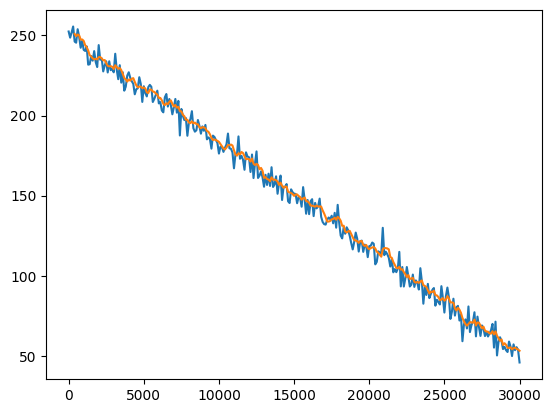

In [54]:
import csv

N=5

with open('data/sensor_data.csv', encoding='utf-8-sig') as f:
    
    f = csv.reader(f)
    next(f, None)

    time = []
    data = []

    for line in list(f):
        time.append(int(line[0]))
        data.append(float(line[1]))

    filtered = []

    for ii in range(0, len(data)-(N-1)):
        filtered.append([sum(data[ii:ii+N])/N])
    
    print(filtered)



plt.plot(time, data)
plt.plot(time[N-1:], filtered)
plt.show()

# increasing N makes the 'filtered' line smoother